In [ ]:
import os

import numpy as np
import torch
import torch.optim as optim

from load_and_plot_model import load_and_plot_model
from train_multiple_rnns import train_multiple_rnns
from train_rnn import MyRNN, train

# Define the hyperparameter search space
hidden_dims = [512]
g_values = [0.1,0.5,0.9]
nonlinearities = ['tanh','relu'] #'relu'
initialization_types = ["uniform"] # "uniform"
tasks = ['ready_set_go', 'delay_discrimination', 'flip_flop','integrator']

# Create a folder to save weights
weights_folder = "rnn_weights_3"
os.makedirs(weights_folder, exist_ok=True)

# Training settings
epochs = 3000
batch_size = 32
learning_rate = 1e-3

hyperparameters = {'hidden_dims': hidden_dims, 'initialization_types': initialization_types, 'g_values': g_values,
                   'nonlinearities': nonlinearities, 'tasks': tasks, 'epochs': epochs, 'batch_size': batch_size,
'learning_rate': learning_rate, 'max_retries': 3, 'weights_folder': weights_folder}

# Assuming task_dataset_class is the class implementing the tasks (from your earlier task dataset implementation)
train_multiple_rnns(**hyperparameters)

cpu
Training: hidden_dim=512, init_type=uniform, g=0.1, nonlinearity=tanh, task=ready_set_go
Epoch 1/3000, Loss: 0.2629
New best loss: 0.2629 at epoch 1
New best loss: 0.2372 at epoch 3
New best loss: 0.2250 at epoch 5
New best loss: 0.2030 at epoch 6
New best loss: 0.1229 at epoch 7
New best loss: 0.1217 at epoch 11
New best loss: 0.1112 at epoch 12
New best loss: 0.1074 at epoch 18
New best loss: 0.1028 at epoch 20
Epoch 21/3000, Loss: 0.1376
New best loss: 0.1009 at epoch 22
New best loss: 0.0878 at epoch 23
New best loss: 0.0779 at epoch 35
New best loss: 0.0729 at epoch 36
Epoch 41/3000, Loss: 0.0746
New best loss: 0.0617 at epoch 42
New best loss: 0.0405 at epoch 43
New best loss: 0.0328 at epoch 44
New best loss: 0.0292 at epoch 47
New best loss: 0.0281 at epoch 48
New best loss: 0.0259 at epoch 60
Epoch 61/3000, Loss: 0.0228
New best loss: 0.0228 at epoch 61
New best loss: 0.0200 at epoch 71
New best loss: 0.0180 at epoch 78
Epoch 81/3000, Loss: 0.0186
New best loss: 0.0169 at 

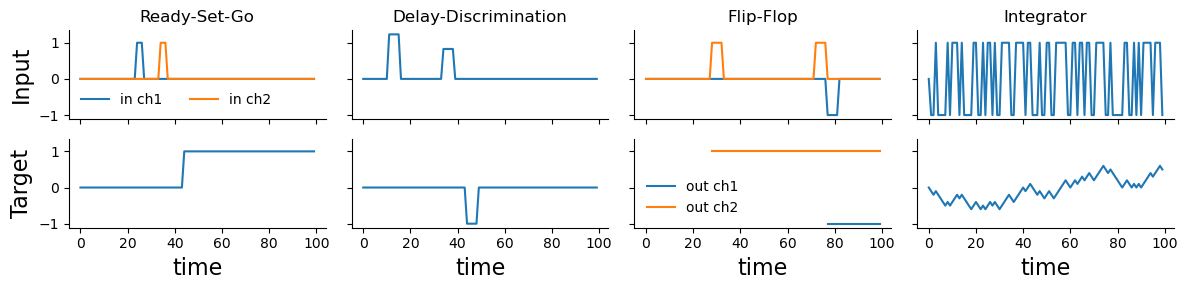

In [228]:
tasks = ['ready_set_go', 'delay_discrimination', 'flip_flop', 'integrator']

task_name = ['Ready-Set-Go', 'Delay-Discrimination', 'Flip-Flop', 'Integrator']
fig,ax = plt.subplots(2,4,sharex=True,sharey=True,figsize=(12,3))
for i,task in enumerate(tasks):
    task_dataset = RNNTaskDataset(n_trials=1, time=100, n_channels=2)
    x, y = getattr(task_dataset, task)()  # Get the input and target outputs for the task

    ax[0,i].set_title(task_name[i])

    ax[1,i].set_xlabel('time',size=16)

    ax[0,0].set_ylabel('Input',size=16)
    ax[1,0].set_ylabel('Target',size=16)
    
    if x.shape[2]==2:
        ax[0,i].plot(x[:,:,0].flatten(),label='in ch1')
        ax[0,i].plot(x[:,:,1].flatten(),label='in ch2')
        if i==0:
            ax[0,i].legend(frameon=False,loc='best',ncol=2)
    else:
        ax[0,i].plot(x.flatten())
        
    if y.shape[2]==2:
        ax[1,i].plot(y[:,:,0].flatten(),label='out ch1')
        ax[1,i].plot(y[:,:,1].flatten(),label='out ch2')
        ax[1,i].legend(frameon=False)
    else:
        ax[1,i].plot(y.flatten())

    ax[1,i].tick_params(axis='both',labelsize=10)

    

plt.tight_layout()
sns.despine()
plt.savefig('task.pdf')
plt.show()

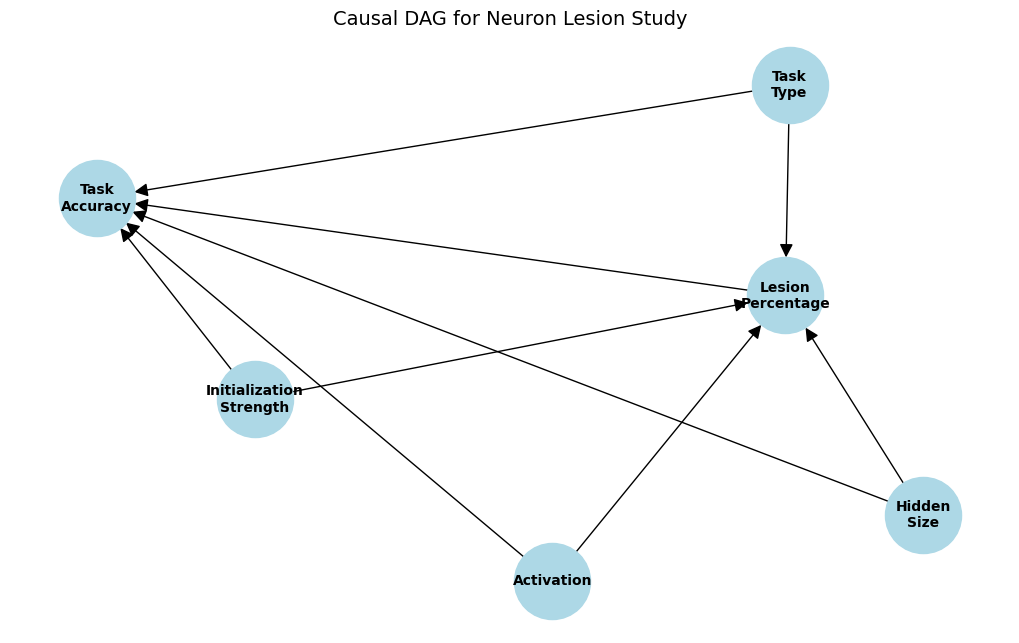

In [259]:
# Re-attempting to create the DAG using matplotlib without downloading the file.
import networkx as nx
# Create a Directed Acyclic Graph (DAG)
G = nx.DiGraph()

# Add nodes (variables)
G.add_nodes_from([
    "Task\nType", "Hidden\nSize", "Activation", "Initialization\nStrength", 
    "Lesion\nPercentage", "Task\nAccuracy"
])

# Add edges (dependencies and confounding relationships)
# Task configuration affects both Lesion Percentage and Task Accuracy
G.add_edges_from([
    ("Task\nType", "Lesion\nPercentage"),
    ("Task\nType", "Task\nAccuracy"),
    ("Hidden\nSize", "Lesion\nPercentage"),
    ("Hidden\nSize", "Task\nAccuracy"),
    ("Activation", "Lesion\nPercentage"),
    ("Activation", "Task\nAccuracy"),
    ("Initialization\nStrength", "Lesion\nPercentage"),
    ("Initialization\nStrength", "Task\nAccuracy"),
    
    # Lesion percentage directly affects Task Accuracy
    ("Lesion\nPercentage", "Task\nAccuracy")
])

# Plot the DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
plt.title("Causal DAG for Neuron Lesion Study", fontsize=14)
plt.show()
